Boosting

Implement Gradient Boosting on Advanced House Price Prediction

In [1]:
#connect the google drive with the colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
Test_path ='/content/drive/MyDrive/Data Science/ML/advance_housing/test.csv'
Train_path ='/content/drive/MyDrive/Data Science/ML/advance_housing/train.csv'

In [4]:
housing_train = pd.read_csv(Train_path)
housing_test = pd.read_csv(Test_path)

In [5]:
housing_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
housing_train.shape

(1460, 81)

In [ ]:
housing_train.info()

In [ ]:
housing_train.describe()

In [ ]:
# Sample provides 3 sample rows from the dataset random.
housing_train.sample(3).T

In [ ]:
# Using the correlation matrix to discover the relationship of the features in respect to the target value in this case the SalePrice.
corr_matrix = housing_train.corr()
top_correlated_feature = corr_matrix.index
corr_matrix['SalePrice'].sort_values(ascending=False)

We can found whether a positive correlation that is close to +1 and a close negative correlation are those features that are closer to -1.

In [ ]:
plt.figure(figsize= (20,20))
sns.heatmap(housing_train[top_correlated_feature].corr(),annot = True,cmap="RdYlGn")

The diagonal green line with 1 shows a 1 to 1 relationship with a feature to itself. Asides from the diagonal line, the closer to the shade of green it is the closer positive correlation. The closer to the shade of red the strong negative correlation. The close to the shade of yellow shows almost no relationship to the SalePrice

In [ ]:
# strong positive relationship between the Overall Quality of the house and sale price
housing_train.plot(kind='scatter',x ='OverallQual',y = 'SalePrice',color = 'b',alpha=0.5)

Data Cleaning

In [ ]:
## The label feature what we are trying to predict
housing_label = housing_train['SalePrice']

In [14]:
housing_train = housing_train.drop('SalePrice',axis=1)

In [ ]:
housing_train.info()

In [45]:
# Dropping feature whose attributes are >1000
feature = []
nullvalue = []
for i in housing_train:
  if (housing_train.isna().sum()[i])>1000 and i!='SalePrice':
    feature.append(i)
    nullvalue.append(housing_train.isna().sum()[i])
print(feature)


[]


In [17]:
housing_train = housing_train.dropna(axis=1,how="any",thresh=1000)

In [18]:
housing_train.shape

(1460, 75)

Dealing with numerical attributes of the dataset.

1.   List item
2.   List item



In [ ]:
housing_num = housing_train.select_dtypes(include = {'float','int64'})
housing_num.info()

We need to create an Imputer instance that you want to replace the attribute’s missing values with the median. Then fit the imputer instance to the numerical values using the fit() method.

In [20]:
# filling the missing values using the median
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(housing_num)
# imputer.statatics
housing_num.median().values

array([7.3050e+02, 5.0000e+01, 6.9000e+01, 9.4785e+03, 6.0000e+00,
       5.0000e+00, 1.9730e+03, 1.9940e+03, 0.0000e+00, 3.8350e+02,
       0.0000e+00, 4.7750e+02, 9.9150e+02, 1.0870e+03, 0.0000e+00,
       0.0000e+00, 1.4640e+03, 0.0000e+00, 0.0000e+00, 2.0000e+00,
       0.0000e+00, 3.0000e+00, 1.0000e+00, 6.0000e+00, 1.0000e+00,
       1.9800e+03, 2.0000e+00, 4.8000e+02, 0.0000e+00, 2.5000e+01,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       6.0000e+00, 2.0080e+03])

In [21]:
X = imputer.transform(housing_num)
housing_num = pd.DataFrame(X,columns = housing_num.columns)

Handling text and categorical missing attributes

In [22]:
housing_cat= housing_train.select_dtypes(include=['object'])
housing_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  MasVnrType     1452 non-null   object
 17  ExterQual      1460 non-null   object
 18  ExterCond      1460 non-null

In [23]:
housing_cat = housing_cat.ffill().bfill()

Scikit-Learn provide a transformer called LabelEncoder. This transformer transforms from text categories to integer categories. The following code shows how to LabelEncode multiple columns.

In [24]:
# lable encoding multiple columns
from sklearn.preprocessing import LabelEncoder
encoded = pd.DataFrame(columns =housing_cat.columns,
                       data = LabelEncoder().fit_transform(housing_cat.values.flatten()).reshape(housing_cat.shape)
                       )

In [25]:
encoded

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,127,120,134,86,12,84,75,41,110,110,...,136,71,154,17,125,149,149,166,158,111
1,127,120,134,86,12,54,75,156,59,110,...,136,149,154,17,125,149,149,166,158,111
2,127,120,80,86,12,84,75,41,110,110,...,136,71,154,17,125,149,149,166,158,111
3,127,120,80,86,12,47,75,48,110,110,...,136,71,154,50,155,149,149,166,158,10
4,127,120,80,86,12,54,75,107,110,110,...,136,71,154,17,125,149,149,166,158,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,127,120,134,86,12,84,75,72,110,110,...,136,149,154,17,125,149,149,166,158,111
1456,127,120,134,86,12,84,75,104,110,110,...,136,149,95,17,155,149,149,166,158,111
1457,127,120,134,86,12,84,75,48,110,110,...,136,71,154,17,125,149,149,166,158,111
1458,127,120,134,86,12,84,75,102,110,110,...,63,71,154,17,155,149,149,166,158,111


In [26]:
housing_prepared = pd.concat([housing_num , encoded], axis = 1)

In [27]:
housing_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   OverallQual    1460 non-null   float64
 5   OverallCond    1460 non-null   float64
 6   YearBuilt      1460 non-null   float64
 7   YearRemodAdd   1460 non-null   float64
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   float64
 10  BsmtFinSF2     1460 non-null   float64
 11  BsmtUnfSF      1460 non-null   float64
 12  TotalBsmtSF    1460 non-null   float64
 13  1stFlrSF       1460 non-null   float64
 14  2ndFlrSF       1460 non-null   float64
 15  LowQualFinSF   1460 non-null   float64
 16  GrLivArea      1460 non-null   float64
 17  BsmtFullBath   1460 non-null   float64
 18  BsmtHalf

Scikit-Learn also provides another transformer called OneHotEncoder that converts the integer categorical values to one hot vectors.



In [28]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(categories= 'auto')
housing_cat_1Hot = enc.fit_transform(housing_cat)
housing_cat_1Hot

<1460x234 sparse matrix of type '<class 'numpy.float64'>'
	with 55480 stored elements in Compressed Sparse Row format>

In [29]:
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self , feature_names):
        self._feature_names = feature_names
        
    def fit(self, X, y = None):
        return self
        
    def transform(self, X , y =None):
        return X[self._feature_names]

Scikit-Learn provides a Pipeline class that help with sequences of transformation.

In [30]:
### Create a pipeline  then change the label encoder into one hot encoders
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion

num_attributes = list(housing_num)
categorical_atrributes = list(housing_cat)

num_pipeline = Pipeline( steps = [
    ('selector', FeatureSelector(num_attributes)),
    ('imputer', SimpleImputer(strategy = 'median')),
    ('std_scaler', StandardScaler()),
])
categorical_transformer = Pipeline(steps=[
('imputer', SimpleImputer(strategy='most_frequent')),
('imput', OneHotEncoder(handle_unknown='ignore'))
])


full_pipeline = FeatureUnion(transformer_list = [
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', categorical_transformer)
])



In [31]:
housing_pr = full_pipeline.fit_transform(housing_train)

**Select a model and train**

Use the gradient boosting regressor for datadet

In [32]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, learning_rate=1.0)
gbrt.fit(housing_pr , housing_label)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=120)

In [33]:
from sklearn.metrics import mean_squared_error
housing_predictions = gbrt.predict(housing_pr )
gbrt_mse = mean_squared_error(housing_label, housing_predictions)
gbrt_rmse = np.sqrt(gbrt_mse)
gbrt_rmse

10090.524498703

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


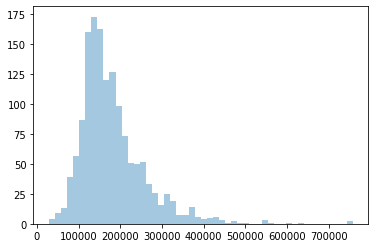

In [34]:
sns.distplot(gbrt.predict(housing_pr),kde=None)

In [35]:
sample_data = housing_train.iloc[:5]
sample_labels = housing_label.iloc[:5]
sample_data_prepared = full_pipeline.transform(sample_data)
predictions =gbrt.predict(sample_data_prepared)
print("Predictions:\t" ,predictions )

Predictions:	 [208500.         179342.06525302 221863.44031094 143794.49443604
 253987.38653922]


In [36]:
diff_in_labels = sample_labels - predictions
print("The difference between prediction and the actual prices:\t", diff_in_labels )

The difference between prediction and the actual prices:	 0       0.000000
1    2157.934747
2    1636.559689
3   -3794.494436
4   -3987.386539
Name: SalePrice, dtype: float64


In [37]:
gbrt.score(housing_pr , housing_label)

0.9838557003646118

In [38]:
features = []
nullValues = []
for i in housing_test:
    if (housing_test.isna().sum()[i])>1000 and i!='SalePrice':
        features.append(i)
        nullValues.append(housing_test.isna().sum()[i])
print(features)

['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [39]:
housing_test = housing_test.dropna(axis=1, how='any', thresh = 1000)


In [40]:
housing_test_prepared =  full_pipeline.transform(housing_test)

In [41]:
target_predictions = gbrt.predict(housing_test_prepared)

target_predictions = np.reshape(target_predictions, -1)


In [42]:
solution = pd.DataFrame({"id":housing_test.Id, "SalePrice":target_predictions})

solution.to_csv('submission.csv', index=False)

In [43]:
solution

,id,SalePrice
0,1461,143521.080264
1,1462,176556.360573
2,1463,191498.940131
3,1464,193464.740623
4,1465,201894.851276
...,...,...
1454,2915,87856.012398
1455,2916,81624.218440
1456,2917,160563.565592
1457,2918,121015.219820
